In [206]:
# -*- coding: utf-8 -*
import pandas as pd
import numpy as np
import nltk 
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

train = pd.read_csv("linear_train.txt", header=None, names=['word','y'])
test = pd.read_csv("linear_test.txt", header=None, names=['word'])
linear_ans_example = pd.read_csv("linear_ans_example.txt")

In [207]:
def lower_(text):
    lowered_text = text.lower()
    return lowered_text

In [208]:
train['word'] = train['word'].apply(lower_)
train.sample(frac=1.0)

In [209]:
y = []
for i in range(len(train[y])):
    if (train['y'][i] == 0):
        y.append(-1)
    else:
        y.append(1)

In [210]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', binary=True, ngram_range=(1,6), 
                                   min_df=1)
counts = ngram_vectorizer.fit_transform(train['word'])
len(ngram_vectorizer.get_feature_names())

354113

In [211]:
algo = LogisticRegression(penalty='l2', C=0.53)
algo.fit(counts, y)
cv=StratifiedKFold(shuffle = True)
print (cross_val_score(algo, counts, y, scoring="roc_auc", cv=cv).mean())

0.913257466789


In [212]:
matrix = ngram_vectorizer.transform(test['word'])

In [213]:
predictions = algo.predict_proba(matrix)
predictions = predictions

In [214]:
linear_ans_example['Answer'] = predictions
linear_ans_example.to_csv("linear_ans_example.txt", sep=',', index=False)

In [215]:
c_array = np.linspace(0.3, 3, 10)
c_array

array([ 0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ])

In [216]:
%%time
roc = []
for i in c_array:
    algo = LogisticRegression(penalty='l2', C=i)
    algo.fit(counts, y)
    roc.append(cross_val_score(algo, counts, y, scoring="roc_auc", cv=cv).mean())
    %time

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 23.1 µs
CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 50.3 µs
CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 10 µs
CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 8.11 µs
CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 13.1 µs
CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 11.9 µs
CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 5.96 µs
CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 4.05 µs
CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 8.82 µs
CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 5.25 µs
CPU times: user 11min 16s, sys: 39.4 s, total: 11min 55s
Wall time: 7min 33s


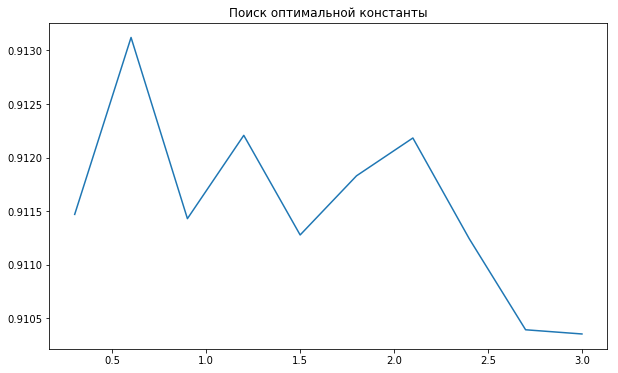

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

r = np.array(roc)
x = np.arange(20)
plt.figure(figsize=(10, 6))
plt.plot(c_array, roc)
plt.title('Поиск оптимальной константы')
plt.show()

In [218]:
max(roc)

0.91312080621894598

In [219]:
roc

[0.91146961708790997,
 0.91312080621894598,
 0.91143000001922925,
 0.91220737913656846,
 0.91127775886867768,
 0.91182958879252085,
 0.91218259062933171,
 0.9112427305318086,
 0.91039290770960457,
 0.91035368591895161]